In [1]:

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '/net/fs11/d0/emfreese/BC-IRF/')
import utils

%matplotlib inline
%load_ext autoreload
%autoreload 2

Equation 9 from B. Aamaas et al. regional temperature change potentials


The temperature response at time H in latitude band m for an emission E of species i is 

$T_{i,r,m,s} (H ) = E_{i,r,s} × ARTP_{i,r,m,s} (H) $

In [2]:
iterables = [["s_subtropic", "tropics", "n_subtropic", "n_arctic", "global"], [10,20,50,100]]
data = np.linspace(1e-4, 3e-3, 20) #K/Tg BC

#for emissions from EAS
#ARTP_df = pd.DataFrame(columns = ['BC'], index = pd.MultiIndex.from_product(iterables, names=["latitude", "time_horizon"]), data = data)

In [3]:
ARTP_df = pd.read_excel(f'{utils.raw_data_in_path}/aamaas_artp_tableS4.xlsx')#, dtype = {'BC_K_Tg': np.float64})
ARTP_df = ARTP_df.set_index(['Emis_season','Location','t_horizon'])

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [55]:
E = 50 #Tg over time

In [4]:
def delta_t(ARTP, E):#, t, rec_loc):
    #ARTP.xs([ssn, rec_loc, ])
    return(ARTP * E)

In [57]:
t_response = delta_t(ARTP_df, E)

In [58]:
def convert_tg_to_ug(df, column):
    ug_in_tg = 1e12
    df_new = df/ug_in_tg
    df_new = df_new.rename(columns = {column: 'BC_K_ug'})
    return(df_new)

In [59]:
t_response = convert_tg_to_ug(t_response, 'BC_K_Tg')

In [65]:
t_response.to_csv(f'{utils.data_output_path}/ARTP_processed.csv')

/home/software/anaconda3/2020.11/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2923: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


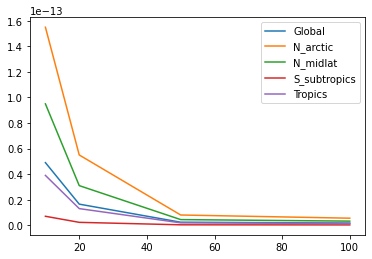

In [63]:
fig, ax = plt.subplots()
for reg in np.unique(t_response.reset_index()['Location']):
    ax.plot(t_response.xs(['Winter',reg]), label = reg)
    ax.legend()

In [ ]:
##### ADD IN CO2